In [1]:
# Importing libraries

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [3]:
dirs = os.listdir('Images/')

In [4]:
count = 0
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir+ ' Folder has ' + str(len(files)) + ' Images')
    count = count+len(files)
print('Images Folder has '+ str(count)+' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


# Load images into arrays as dataset

In [5]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                        seed=123,
                                                        validation_split=0.2,
                                                        subset = 'training',
                                                        batch_size=batch,
                                                        image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                        seed=123,
                                                        validation_split=0.2,
                                                        subset = 'validation',
                                                        batch_size=batch,
                                                        image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [8]:
flower_names = train_ds.class_names

In [9]:
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [10]:
import matplotlib.pyplot as plt

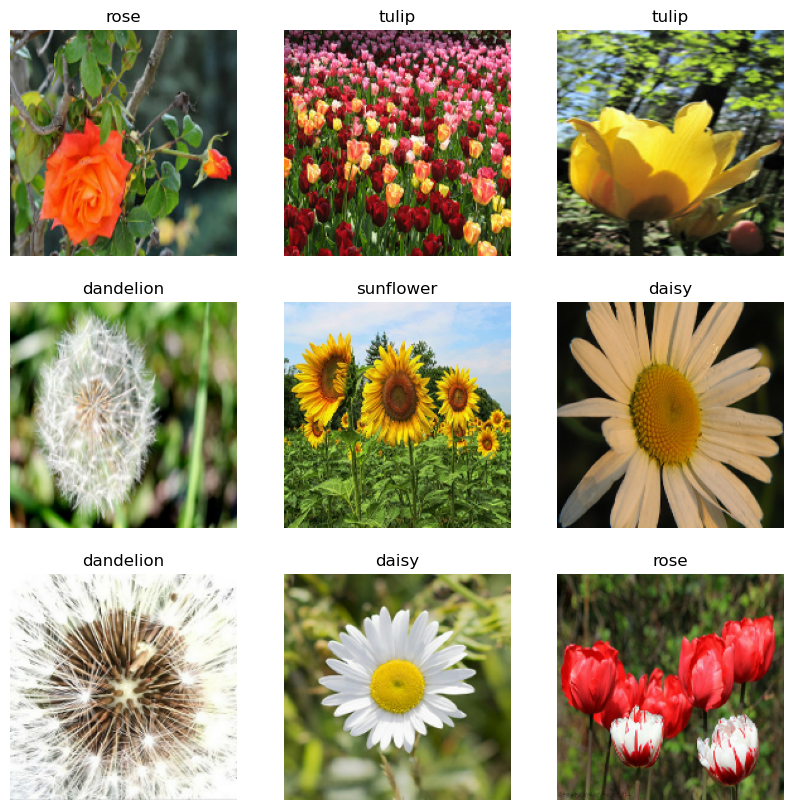

In [11]:
i=0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [14]:
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

# Data Augmentation

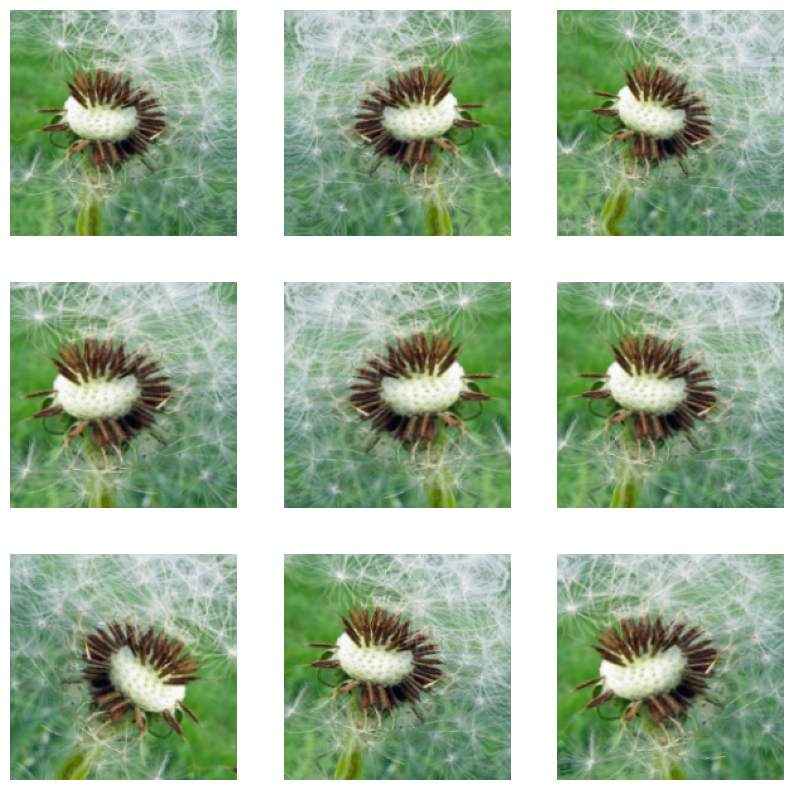

In [15]:
from tensorflow.keras.layers import Input, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

img_size = 180 

# Data augmentation layer
data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)), 
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])

plt.figure(figsize=(10,10)) #Visualizing augmented images from a dataset

for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images) 
        plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))  
        plt.axis('off')

plt.show()


# Model Creation

In [16]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(5)
])

In [17]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 63s 531ms/step - accuracy: 0.3450 - loss: 1.4940 - val_accuracy: 0.5574 - val_loss: 1.0778
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 69s 644ms/step - accuracy: 0.5818 - loss: 1.0672 - val_accuracy: 0.6037 - val_loss: 0.9803
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 56s 515ms/step - accuracy: 0.6302 - loss: 0.9556 - val_accuracy: 0.6234 - val_loss: 0.9408
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 54s 495ms/step - accuracy: 0.6588 - loss: 0.9011 - val_accuracy: 0.6524 - val_loss: 0.8783
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 486ms/step - accuracy: 0.7017 - loss: 0.7890 - val_accuracy: 0.6663 - val_loss: 0.8573
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 484ms/step - accuracy: 0.6960 - loss: 0.7735 - val_accuracy: 0.6779 - val_loss: 0.8449
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 487ms/step - accuracy: 0.7048 - loss: 0.7736 - val_accuracy: 0.7115 - val_loss: 0.8207
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 486ms/step - accuracy: 0.7327 - loss: 0

In [20]:
input_image = tf.keras.utils.load_img('Sample/tuilip1.jpg', target_size=(180,180))

In [21]:
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array,0)

prediction = model.predict(input_image_exp_dim)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


In [22]:
prediction[0]

array([-1.438077 , -1.8917394,  3.8644743, -3.3271868,  5.2353415],
      dtype=float32)

In [23]:
result = tf.nn.softmax(prediction[0])

In [24]:
flower_names[np.argmax(result)]

'tulip'

In [25]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)
    prediction = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(prediction[0])
    outcome = 'The Image belongs to '+ flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [26]:
classify_images('Sample/rose3.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


'The Image belongs to rose with a score of 82.91875720024109'

In [27]:
model.save('Flower_Recognition_Model.keras')